In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("superstore.csv", encoding="latin1")

In [4]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   è®°å½æ°       51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [6]:
# Make all column names lowercase
df.columns = df.columns.str.lower()

# Replace spaces and dots with underscore
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")

# Rename the broken encoded column safely
df.rename(columns={
    'è®°å½æ°': 'row_count'
}, inplace=True)

# Check final column names
df.columns


Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'row_count', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')

In [7]:
# Convert date columns
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Ensure numeric columns are numeric
numeric_cols = ['sales', 'profit', 'quantity', 'discount', 'shipping_cost']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   category        51290 non-null  object        
 1   city            51290 non-null  object        
 2   country         51290 non-null  object        
 3   customer_id     51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   discount        51290 non-null  float64       
 6   market          51290 non-null  object        
 7   row_count       51290 non-null  int64         
 8   order_date      51290 non-null  datetime64[ns]
 9   order_id        51290 non-null  object        
 10  order_priority  51290 non-null  object        
 11  product_id      51290 non-null  object        
 12  product_name    51290 non-null  object        
 13  profit          51290 non-null  float64       
 14  quantity        51290 non-null  int64         
 15  re

In [8]:
# Fill missing numeric values
df['sales'] = df['sales'].fillna(0)
df['profit'] = df['profit'].fillna(0)
df['quantity'] = df['quantity'].fillna(0)
df['discount'] = df['discount'].fillna(0)
df['shipping_cost'] = df['shipping_cost'].fillna(0)

# Drop rows missing critical categorical data
df.dropna(subset=['region', 'category', 'sub_category', 'customer_name'], inplace=True)

# Final check
df.isnull().sum()


category          0
city              0
country           0
customer_id       0
customer_name     0
discount          0
market            0
row_count         0
order_date        0
order_id          0
order_priority    0
product_id        0
product_name      0
profit            0
quantity          0
region            0
row_id            0
sales             0
segment           0
ship_date         0
ship_mode         0
shipping_cost     0
state             0
sub_category      0
year              0
market2           0
weeknum           0
dtype: int64

In [9]:
# KPI 1: Total Sales
total_sales = df['sales'].sum()

# KPI 2: Total Profit
total_profit = df['profit'].sum()

# KPI 3: Top 5 Customers by Sales
top_5_customers = (
    df.groupby('customer_name')['sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

total_sales, total_profit, top_5_customers


(np.int64(12642905),
 np.float64(1467457.2912800002),
 customer_name
 Tom Ashbrook          40489
 Tamara Chand          37453
 Greg Tran             35552
 Christopher Conant    35187
 Sean Miller           35170
 Name: sales, dtype: int64)

In [10]:
# Example filter values (simulate dashboard filters)
selected_region = df['region'].unique()
selected_category = df['category'].unique()
selected_sub_category = df['sub_category'].unique()

# Apply filters
filtered_df = df[
    (df['region'].isin(selected_region)) &
    (df['category'].isin(selected_category)) &
    (df['sub_category'].isin(selected_sub_category))
]

# Filtered KPIs
filtered_total_sales = filtered_df['sales'].sum()
filtered_total_profit = filtered_df['profit'].sum()

filtered_top_5_customers = (
    filtered_df.groupby('customer_name')['sales']
               .sum()
               .sort_values(ascending=False)
               .head(5)
)

filtered_total_sales, filtered_total_profit, filtered_top_5_customers


(np.int64(12642905),
 np.float64(1467457.2912800002),
 customer_name
 Tom Ashbrook          40489
 Tamara Chand          37453
 Greg Tran             35552
 Christopher Conant    35187
 Sean Miller           35170
 Name: sales, dtype: int64)

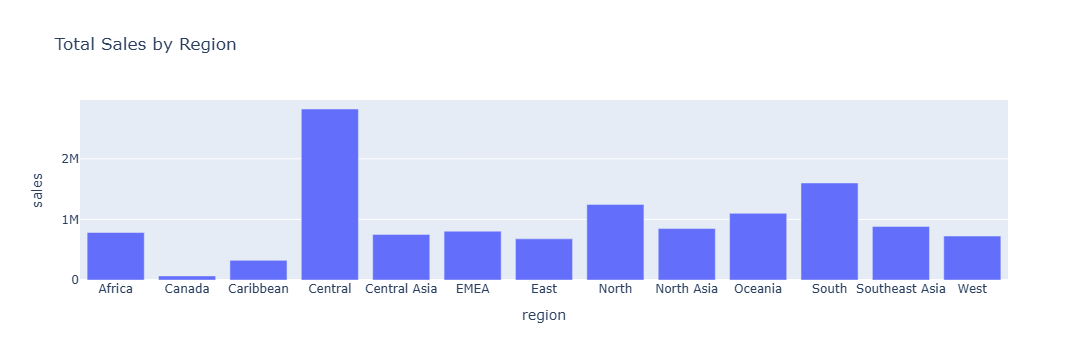

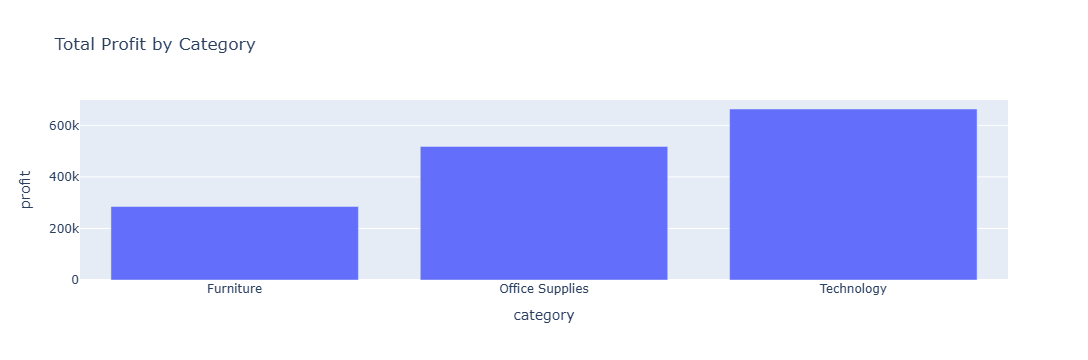

In [11]:
import plotly.express as px

# Sales by Region
sales_by_region = (
    df.groupby('region')['sales']
      .sum()
      .reset_index()
)

fig1 = px.bar(
    sales_by_region,
    x='region',
    y='sales',
    title='Total Sales by Region'
)

fig1.show()

# Profit by Category
profit_by_category = (
    df.groupby('category')['profit']
      .sum()
      .reset_index()
)

fig2 = px.bar(
    profit_by_category,
    x='category',
    y='profit',
    title='Total Profit by Category'
)

fig2.show()
